In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\HP\perrin-freres-monthly-champagne-.csv")

In [3]:
df


,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [4]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
df.columns=["Month", "Sales"]

In [6]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [7]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [8]:
df.dropna(inplace = True)

In [9]:
df.duplicated().sum()

0

In [10]:
import matplotlib as plt
import seaborn as sns

In [11]:
df

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [13]:
pd.to_datetime(df.Month)

0     1964-01-01
1     1964-02-01
2     1964-03-01
3     1964-04-01
4     1964-05-01
         ...    
100   1972-05-01
101   1972-06-01
102   1972-07-01
103   1972-08-01
104   1972-09-01
Name: Month, Length: 105, dtype: datetime64[ns]

In [14]:
#converting datetime datatype of Month column
df['Month'] = pd.to_datetime(df.Month)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


<AxesSubplot:xlabel='Sales', ylabel='Month'>

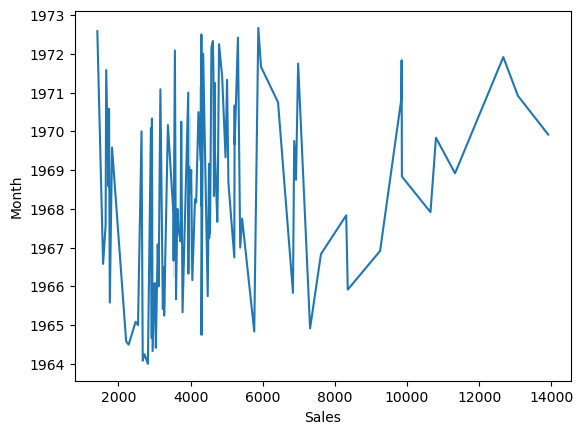

In [16]:
#plt.plot(df.Sales)
sns.lineplot(x = 'Sales', y = 'Month', data = df)

In [17]:
#making index
df.set_index('Month', inplace = True)

In [18]:
df

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(df['Sales'])

In [21]:
result

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [22]:
p_value = result[1]
p_value

0.3639157716602447

In [23]:
if p_value<0.05:
    print("it is a stationary series")
else:
    print("it is not stationary")

it is not stationary


In [24]:
#TO Make Series Stationary We Will Do Differencing
df_diff = df['Sales']-df['Sales'].shift(1)

In [25]:
df_diff

Month
1964-01-01       NaN
1964-02-01    -143.0
1964-03-01      83.0
1964-04-01     -34.0
1964-05-01     225.0
               ...  
1972-05-01    -170.0
1972-06-01     694.0
1972-07-01   -1014.0
1972-08-01   -2885.0
1972-09-01    4464.0
Name: Sales, Length: 105, dtype: float64

In [26]:
result = adfuller(df_diff.dropna())

In [27]:
p_value = result[1]
p_value

2.5196204473869244e-10

In [28]:
if p_value<0.05:
    print("It is stationary")
else:
    print("It is not stationary")

It is stationary


In [29]:
df_diff.shape

(105,)

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


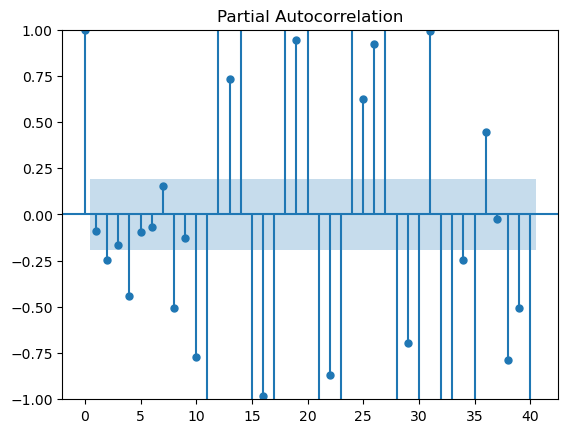

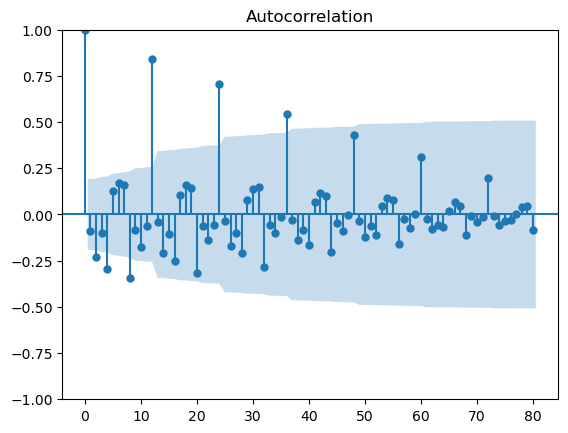

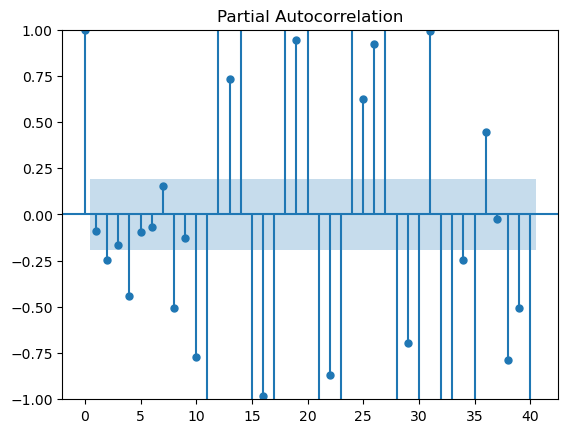

In [31]:
plot_acf (df_diff.dropna(),lags = 80)
plot_pacf(df_diff.dropna(), lags = 40)

In [32]:
!pip install pmdarima

In [33]:
import pmdarima
from pmdarima import auto_arima
auto_arima(df)

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [34]:
p = range(0,8)
d = range(1,2)
q= range(0,8)

In [35]:
import itertools
pdq_combination = list(itertools.product(p,d,q))

In [36]:
pdq_combination

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [37]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [38]:
train = df[:80]
test = df[80:]

In [39]:
test

,Sales
Month,
1970-09-01,5221.0
1970-10-01,6424.0
1970-11-01,9842.0
1970-12-01,13076.0
1971-01-01,3934.0
1971-02-01,3162.0
1971-03-01,4286.0
1971-04-01,4676.0
1971-05-01,5010.0


In [52]:
from sklearn.metrics import *
rmse = []
order1 = []

for pdq in pdq_combination:
        #model = ARIMA(train, order=pdq).fit()
        model = ARIMA(train,order=pdq)
        model_fit=model.fit()
        pred = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [53]:
rmse

[4825.5655046843995,
 4564.149742759068,
 3013.0519148591993,
 3011.8098729291823,
 3115.823915701717,
 2651.1759478395734,
 2692.8727845170256,
 2571.8562598938865,
 4709.851842317437,
 3104.042531932148,
 3002.716014184987,
 2991.9588770111704,
 3048.649604150773,
 2741.2618627532765,
 2854.3887197372087,
 2705.4033673363015,
 4401.870111043923,
 2970.2909483770386,
 3028.7788802470113,
 3020.969375244857,
 2918.357994342383,
 2526.167757774861,
 2742.707416450525,
 2531.655984429331,
 4284.570970974992,
 2917.540163214598,
 2979.40814017652,
 2615.4228583851227,
 2478.6901091197756,
 2735.073992694433,
 2327.2944886068535,
 2273.127765826185,
 3975.33268529205,
 3900.139868647596,
 2855.1321847571917,
 2857.5866091836924,
 2458.6066165130283,
 2609.4784676600975,
 2283.8150312916914,
 2473.9597828166416,
 3939.7293847024544,
 2929.667349617468,
 2857.8635839130557,
 2785.588933563579,
 2557.468890285664,
 2430.362663412905,
 2378.084606227261,
 2410.815835924659,
 3926.063356239625,

In [54]:
order1

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 1, 0),
 (5, 1, 1),
 (5, 1, 2),
 (5, 1, 3),
 (5, 1, 4),
 (5, 1, 5),
 (5, 1, 6),
 (5, 1, 7),
 (6, 1, 0),
 (6, 1, 1),
 (6, 1, 2),
 (6, 1, 3),
 (6, 1, 4),
 (6, 1, 5),
 (6, 1, 6),
 (6, 1, 7),
 (7, 1, 0),
 (7, 1, 1),
 (7, 1, 2),
 (7, 1, 3),
 (7, 1, 4),
 (7, 1, 5),
 (7, 1, 6),
 (7, 1, 7)]

In [55]:
a = pd.DataFrame (index = order1, data= rmse, columns = ['RMSE'])

In [56]:
a.sort_values('RMSE')

,RMSE
"(7, 1, 7)",2132.748851
"(7, 1, 6)",2254.970900
"(3, 1, 7)",2273.127766
"(4, 1, 6)",2283.815031
"(6, 1, 6)",2291.674684
...,...
"(3, 1, 0)",4284.570971
"(2, 1, 0)",4401.870111
"(0, 1, 1)",4564.149743
"(1, 1, 0)",4709.851842


In [57]:
model = ARIMA(df['Sales'], order = (7,1,7))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [59]:
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
df['Forecase'] = model_fit.predict(start = 80, end = 104)

<AxesSubplot:xlabel='Month'>

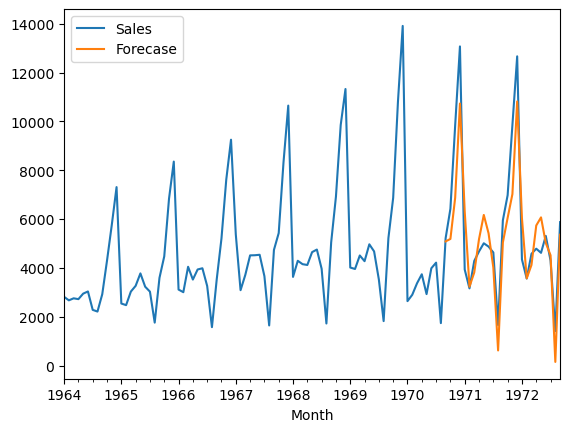

In [61]:
df.plot()

In [62]:
df['More'] = model_fit.predict(start= 100, end = 200)

In [63]:
df['More']

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01            NaN
1964-04-01            NaN
1964-05-01            NaN
                 ...     
1972-05-01    6071.392256
1972-06-01    5020.650714
1972-07-01    4517.298346
1972-08-01     148.519071
1972-09-01    5361.350186
Name: More, Length: 105, dtype: float64

In [66]:
from pandas.tseries.offsets import DateOffset

In [67]:
future = [df.index[-1] + DateOffset(months = x)for x in range (0,24)]

In [68]:
future

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [69]:
future = pd.DataFrame(index = future[1:])

In [70]:
future = model_fit.predict(start = 100, end = 150)

<AxesSubplot:>

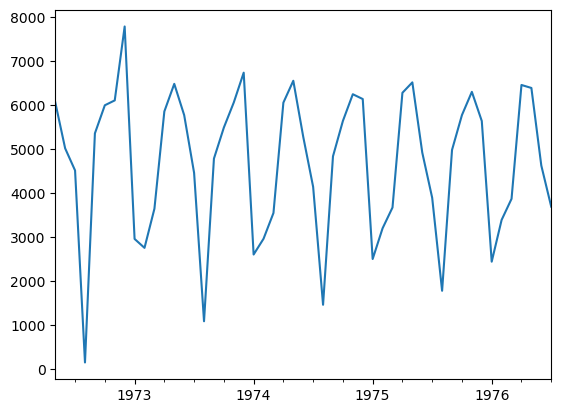

In [71]:
future.plot()

In [72]:
future

1972-05-01    6071.392256
1972-06-01    5020.650714
1972-07-01    4517.298346
1972-08-01     148.519071
1972-09-01    5361.350186
1972-10-01    6000.066979
1972-11-01    6111.199163
1972-12-01    7792.857836
1973-01-01    2959.301564
1973-02-01    2756.134386
1973-03-01    3646.726868
1973-04-01    5859.647221
1973-05-01    6487.324511
1973-06-01    5775.754060
1973-07-01    4461.719575
1973-08-01    1085.981231
1973-09-01    4787.216949
1973-10-01    5493.631140
1973-11-01    6064.238516
1973-12-01    6742.214898
1974-01-01    2604.702428
1974-02-01    2963.708380
1974-03-01    3549.607493
1974-04-01    6060.124808
1974-05-01    6557.829687
1974-06-01    5284.623551
1974-07-01    4143.539652
1974-08-01    1461.279067
1974-09-01    4839.281489
1974-10-01    5644.225683
1974-11-01    6251.546925
1974-12-01    6142.164052
1975-01-01    2502.536712
1975-02-01    3201.575704
1975-03-01    3674.080067
1975-04-01    6284.173779
1975-05-01    6521.305633
1975-06-01    4924.485875
1975-07-01  